In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('vgsales.csv',parse_dates=False)
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
data['Year']=data['Year'].apply(lambda x: str(x).split('.')[0])
pd.to_datetime(data['Year'])


0       2006-01-01
1       1985-01-01
2       2008-01-01
3       2009-01-01
4       1996-01-01
           ...    
16593   2002-01-01
16594   2003-01-01
16595   2008-01-01
16596   2010-01-01
16597   2003-01-01
Name: Year, Length: 16598, dtype: datetime64[ns]

In [4]:
df=pd.DataFrame(data)
df_reg=df.copy(deep=True )
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df['Year'].replace(to_replace='nan',value='2021',inplace=True)

In [6]:

df.set_index('Year',inplace=True)
df.sort_index()

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,,,,,
1980,1971,Defender,2600,Misc,Atari,0.99,0.05,0.0,0.01,1.05
1980,2671,Boxing,2600,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
1980,6898,Checkers,2600,Misc,Atari,0.22,0.01,0.0,0.00,0.24
1980,6319,Bridge,2600,Misc,Activision,0.25,0.02,0.0,0.00,0.27
1980,5368,Freeway,2600,Action,Activision,0.32,0.02,0.0,0.00,0.34
...,...,...,...,...,...,...,...,...,...,...
2021,13964,World of Tanks,X360,Shooter,NaN,0.00,0.03,0.0,0.00,0.04
2021,5915,Harvest Moon: The Tale of Two Towns,3DS,Simulation,Unknown,0.28,0.00,0.0,0.02,0.30
2021,7910,Pet Zombies,3DS,Simulation,Majesco Entertainment,0.18,0.00,0.0,0.01,0.19


In [7]:
df.describe()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16598 entries, 2006 to 2003
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [9]:
df.isnull().sum()

Rank             0
Name             0
Platform         0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

Publisher null values index

In [10]:
null_index=df[(df['Publisher'].isnull())==True].index
print(null_index)

Index(['2021', '2021', '2007', '2005', '2004', '2004', '2004', '2021', '2004',
       '2004', '2021', '2005', '2021', '2004', '2004', '2004', '2004', '2004',
       '2021', '2004', '2004', '2004', '2004', '2004', '2011', '2005', '2004',
       '2004', '2010', '2021', '2004', '2021', '2021', '2004', '2021', '2021',
       '2021', '2021', '2021', '2021', '2021', '2012', '2010', '2021', '2012',
       '2021', '2005', '2011', '2016', '2021', '2021', '2021', '2005', '2021',
       '2016', '2014', '2011', '2014'],
      dtype='object', name='Year')


Before Dropping Null rows

In [11]:
print(df.shape)

(16598, 10)


In [12]:
df1=df.dropna(axis=0)
df1

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,,,,,
2006,1,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1985,2,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2008,3,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2009,4,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
1996,5,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
2002,16596,Woody Woodpecker in Crazy Castle 5,GBA,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
2003,16597,Men in Black II: Alien Escape,GC,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
2008,16598,SCORE International Baja 1000: The Official Game,PS2,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [13]:
df1.shape

(16540, 10)

In [14]:
df1.sort_index(ascending=False)

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,,,,,
2021,1587,Combat,2600,Action,Atari,1.17,0.07,0.00,0.01,1.25
2021,608,Space Invaders,2600,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
2021,6155,Unreal Championship 2: The Liandri Conflict,XB,Shooter,Midway Games,0.22,0.05,0.00,0.01,0.28
2021,11411,Zero: Tsukihami no Kamen,Wii,Action,Nintendo,0.00,0.00,0.08,0.00,0.08
2021,10981,Samurai Shodown Anthology,PSP,Fighting,Ignition Entertainment,0.08,0.00,0.00,0.01,0.09
...,...,...,...,...,...,...,...,...,...,...
1980,1768,Kaboom!,2600,Misc,Activision,1.07,0.07,0.00,0.01,1.15
1980,6319,Bridge,2600,Misc,Activision,0.25,0.02,0.00,0.00,0.27
1980,6898,Checkers,2600,Misc,Atari,0.22,0.01,0.00,0.00,0.24


H0 : Platform and Genre are dependent

H1 : Platform and Genre are not independet

(for 5% significance level)

In [76]:
observed_values=pd.crosstab(columns=df1.Platform,index=df1.Genre)
finl_obser=observed_values.mask(observed_values<1,1)
finl_obser

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Genre,,,,,,,,,,,,,,,,,,,,,
Action,61,1,182,3,341,6,166,101,3,1,...,3,1,12,1,1,237,63,324,155,68
Adventure,2,1,37,11,240,5,37,20,2,1,...,26,1,4,1,1,84,3,47,26,12
Fighting,2,1,14,12,36,1,23,42,5,1,...,31,1,25,1,1,42,5,65,48,7
Misc,5,1,53,1,391,8,86,36,1,1,...,15,2,17,1,1,280,21,125,46,15
Platform,9,1,28,2,91,19,142,73,7,1,...,5,1,26,1,1,58,16,24,49,4
Puzzle,11,1,19,1,238,15,41,13,1,1,...,5,1,13,1,1,55,4,7,7,1
Racing,6,1,11,6,67,2,64,63,1,1,...,8,1,9,1,1,94,3,105,123,19
Role-Playing,1,1,86,4,200,21,73,27,3,1,...,17,1,50,1,4,35,6,75,23,13
Shooter,24,1,7,3,42,1,40,48,1,1,...,22,1,10,1,1,66,10,201,132,33


In [78]:
from scipy.stats.contingency import chi2_contingency
g, p, dof,expected_fre=chi2_contingency(finl_obser.values)
print('DDOF:{}'.format(dof))
print('Expected values:{}'.format(expected_fre))

DDOF:330
Expected values:[[2.69366388e+01 2.39436789e+00 1.01162043e+02 1.09741862e+01
  4.30188098e+02 1.97535351e+01 1.58826404e+02 1.10939046e+02
  5.78638907e+00 2.39436789e+00 6.36502798e+01 1.99530658e+01
  4.38967447e+00 1.90352247e+02 2.39436789e+00 2.38040075e+02
  4.30786690e+02 2.64577652e+02 6.70423010e+01 2.41631626e+02
  8.20071003e+01 3.45188038e+01 2.59389855e+00 4.76878272e+01
  2.39436789e+00 3.19249052e+00 2.64178591e+02 2.85328840e+01
  2.51608159e+02 1.64413262e+02 4.26995607e+01]
 [1.04546002e+01 9.29297792e-01 3.92628317e+01 4.25928155e+00
  1.66963837e+02 7.66670678e+00 6.16434202e+01 4.30574643e+01
  2.24580300e+00 9.29297792e-01 2.47038330e+01 7.74414826e+00
  1.70371262e+00 7.38791744e+01 9.29297792e-01 9.23876888e+01
  1.67196161e+02 1.02687406e+02 2.60203382e+01 9.37816355e+01
  3.18284494e+01 1.33973765e+01 1.00673927e+00 1.85085144e+01
  9.29297792e-01 1.23906372e+00 1.02532523e+02 1.10741320e+01
  9.76537096e+01 6.38117817e+01 1.65724773e+01]
 [6.9291172

For more than 100 degrees of freedom chi-square critical values may be found in terms of the degrees of freedom D and the corresponding two-sided critical value for a standard normal deviate Z by the equation X^2 = 0.5*(Z + sqrt(2*D-1)^2


In [85]:
z=1.96
X_2=0.5*(z+np.sqrt(2*330-1))**2
X_2

381.73595079973427

In [ ]:
H0 : Platform and Genre are dependent

H1 : Platform and Genre are not independet

In [89]:
index=finl_obser.index
index

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object', name='Genre')

In [93]:
column=finl_obser.columns
column

Index(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64',
       'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV',
       'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB',
       'XOne'],
      dtype='object', name='Platform')

In [91]:
from scipy.stats import chisquare
chisq,p_value=chisquare(f_obs=finl_obser.values,f_exp=expected_fre,ddof=330)
chisq,p_value
i=0
for v in chisq:
    if v>X_2:
        print('reject Null hypothesis  ')
    else:
        print('accept null hypothesis ')
    i+=1
print(i)

accept null hypothesis 
accept null hypothesis 
accept null hypothesis 
accept null hypothesis 
reject Null hypothesis  
accept null hypothesis 
accept null hypothesis 
accept null hypothesis 
accept null hypothesis 
accept null hypothesis 
accept null hypothesis 
accept null hypothesis 
accept null hypothesis 
reject Null hypothesis  
accept null hypothesis 
accept null hypothesis 
accept null hypothesis 
accept null hypothesis 
accept null hypothesis 
accept null hypothesis 
accept null hypothesis 
accept null hypothesis 
accept null hypothesis 
accept null hypothesis 
accept null hypothesis 
accept null hypothesis 
accept null hypothesis 
accept null hypothesis 
accept null hypothesis 
accept null hypothesis 
accept null hypothesis 
31


In [18]:
average_sales_by_platform=df1.groupby(by=['Platform'])['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'].mean()
average_sales_by_platform.head()

<ipython-input-18-b2bd1526b1a0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_sales_by_platform=df1.groupby(by=['Platform'])['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'].mean()


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
2600,0.681203,0.041128,0.000000,0.006842,0.729925
3DO,0.000000,0.000000,0.033333,0.000000,0.033333
3DS,0.155562,0.115404,0.191972,0.024911,0.488028
DC,0.104423,0.032500,0.164615,0.005192,0.307115
DS,0.181201,0.090274,0.081327,0.028075,0.381350


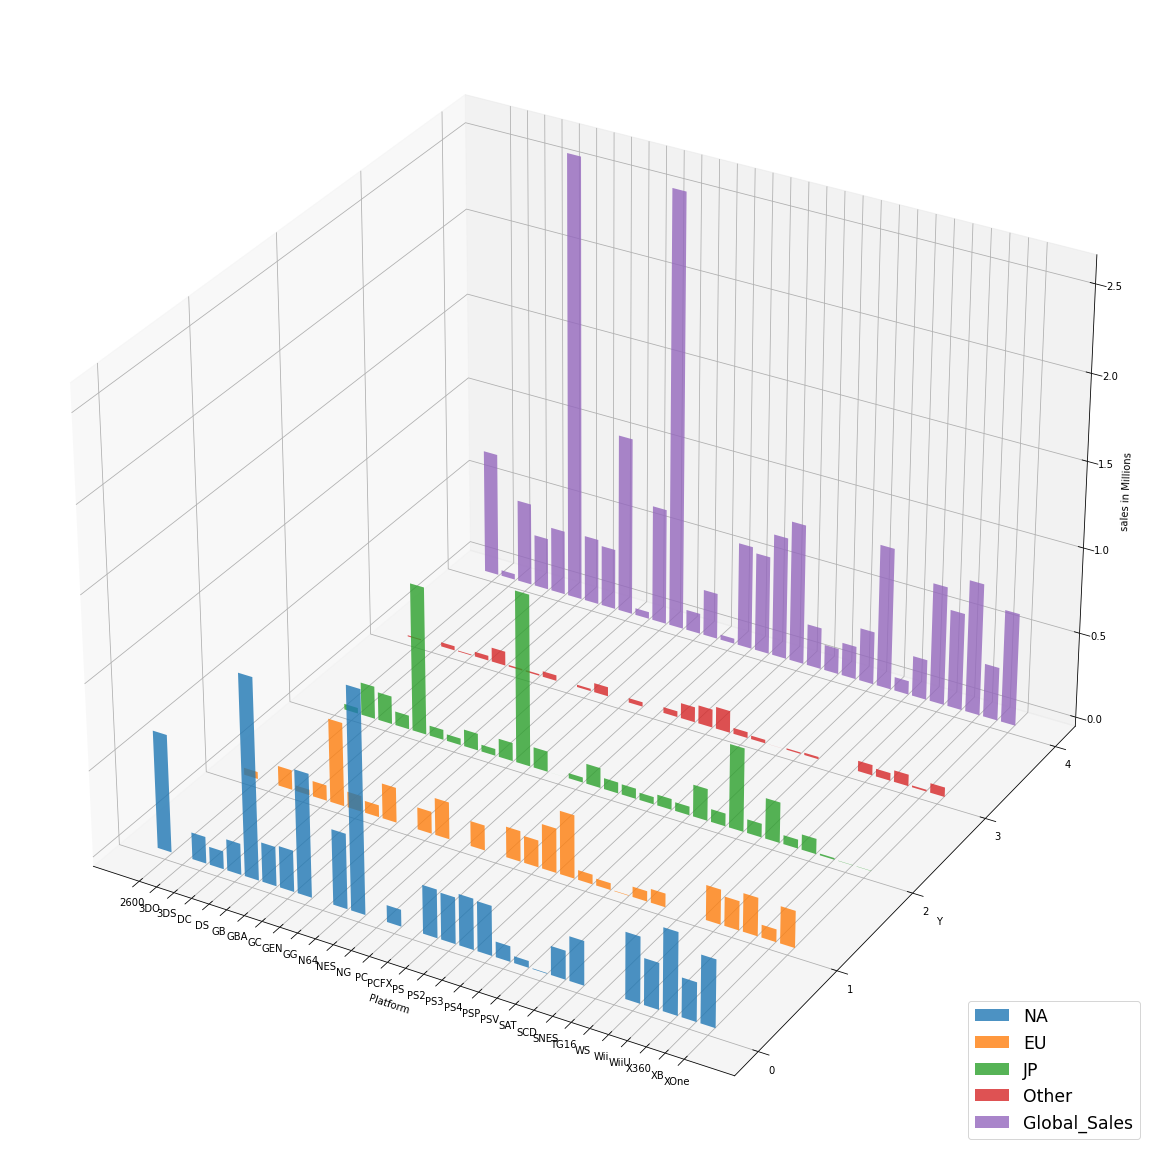

In [19]:
fig=plt.figure(figsize=(21,21))
ax=fig.add_subplot(111,projection='3d')
index=average_sales_by_platform.index
NA=average_sales_by_platform.NA_Sales.values
EU=average_sales_by_platform.EU_Sales.values
JP=average_sales_by_platform.JP_Sales.values
Other=average_sales_by_platform.Other_Sales.values
Global_Sales=average_sales_by_platform.Global_Sales.values

for i in np.arange(5):
    index=average_sales_by_platform.index
    sale=[NA,EU,JP,Other,Global_Sales]
    k_name=['NA','EU','JP','Other','Global_Sales']
    ax.bar(left=index,height=sale[i],zs=i,zdir='y',alpha=0.8,label=k_name[i])

ax.set_xlabel('Platform')
ax.set_ylabel('Y')
ax.set_zlabel('sales in Millions')
ax.set_yticks([4,3,2,1,0])
ax.legend(loc='lower right',fontsize= 'xx-large')
plt.show()

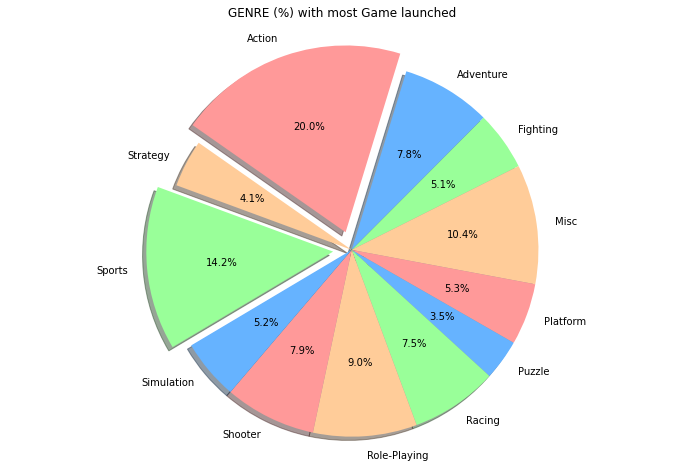

In [20]:
get=df1.groupby(by='Genre')['Name'].count()
plt.figure(figsize=(12,8))
explode=(0.1,0,0,0,0,0,0,0,0,0,0.1,0)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(x=get.values,explode=explode,labels=get.index,autopct='%1.1f%%',shadow=True,startangle=145,counterclock=False,colors=colors)
plt.axis('equal')
plt.title('GENRE (%) with most Game launched')
plt.show()

In [21]:
df1.columns

Index(['Rank', 'Name', 'Platform', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [22]:
sale1=df1.groupby(by='Genre')[ 'NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales'].sum()
sale1

<ipython-input-22-2a014b6926f2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sale1=df1.groupby(by='Genre')[ 'NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales'].sum()


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,877.54,524.92,159.49,187.35
Adventure,105.67,64.08,51.99,16.81
Fighting,221.92,100.22,87.35,36.24
Misc,404.67,213.93,107.72,75.22
Platform,447.05,201.13,130.77,51.59
Puzzle,123.78,50.77,57.31,12.55
Racing,359.42,238.38,56.69,77.27
Role-Playing,327.28,188.05,352.26,59.61
Shooter,582.59,313.24,38.28,102.69


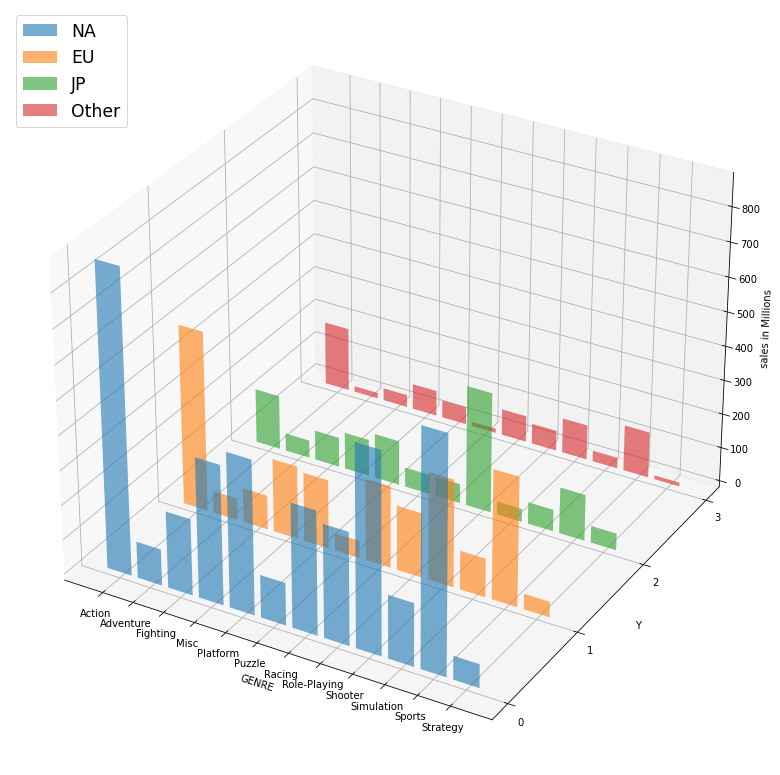

In [23]:
fig=plt.figure(figsize=(16,14))
ax=fig.add_subplot(111,projection='3d')
index=sale1.index
NA=sale1.NA_Sales.values
EU=sale1.EU_Sales.values
JP=sale1.JP_Sales.values
Other=sale1.Other_Sales.values

for i in np.arange(4):
    index=sale1.index
    sales=[NA,EU,JP,Other]
    k_name=['NA','EU','JP','Other']
    ax.bar(left=index,height=sales[i],zs=i,zdir='y',alpha=0.6,label=k_name[i])

ax.set_xlabel('GENRE')
ax.set_ylabel('Y')
ax.set_zlabel('sales in Millions')
ax.set_yticks([3,2,1,0])
ax.legend(loc='upper left',fontsize= 'xx-large')
plt.show()

In [24]:
df1.head()

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,,,,,
2006,1,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1985,2,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2008,3,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2009,4,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
1996,5,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


TOP 20 RANKED GAMES

In [25]:
top20=df1[df1.Rank<21][['Name','Genre','Global_Sales']]
top20['Global_Sales']=top20['Global_Sales'].map(lambda x : x*1000000)
top20

,Name,Genre,Global_Sales
Year,,,
2006,Wii Sports,Sports,82740000.0
1985,Super Mario Bros.,Platform,40240000.0
2008,Mario Kart Wii,Racing,35820000.0
2009,Wii Sports Resort,Sports,33000000.0
1996,Pokemon Red/Pokemon Blue,Role-Playing,31370000.0
1989,Tetris,Puzzle,30260000.0
2006,New Super Mario Bros.,Platform,30010000.0
2006,Wii Play,Misc,29020000.0
2009,New Super Mario Bros. Wii,Platform,28620000.0


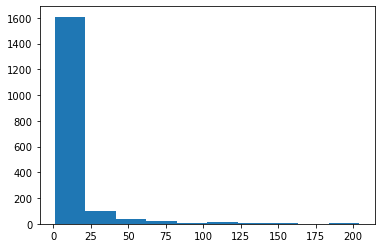

count    1801.000000
mean        9.183787
std        20.500029
min         1.000000
25%         1.000000
50%         2.000000
75%         7.000000
max       204.000000
Name: Name, dtype: float64


In [26]:
grouped=df1.groupby(['Publisher','Platform']).count()

f=pd.DataFrame(grouped)

plt.hist(f.Name.values)
plt.show()
print(f.Name.describe())

In [27]:
Number_of_game_publish=pd.DataFrame(f[f.Name.values>100]['Name'])
Number_of_game_publish.columns=['count']
Number_of_game_publish

count
Publisher                    Platform       
Activision                   DS          111
                             PS2         103
                             PS3         108
                             Wii         111
                             X360        134
Electronic Arts              PC          148
                             PS          106
                             PS2         199
                             PS3         142
                             X360        167
                             XB          123
Konami Digital Entertainment DS          112
                             PS2         163
Namco Bandai Games           DS          135
                             PS2         107
                             PS3         116
                             PSP         121
Nintendo                     DS          151
Sony Computer Entertainment  PS          188
                             PS2         204
                             PS3         129
                             PSP         117
THQ                          DS          115
                             GBA         110
Ubisoft                      DS          181
                             Wii         115

C:\Users\Dell\anaconda3\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


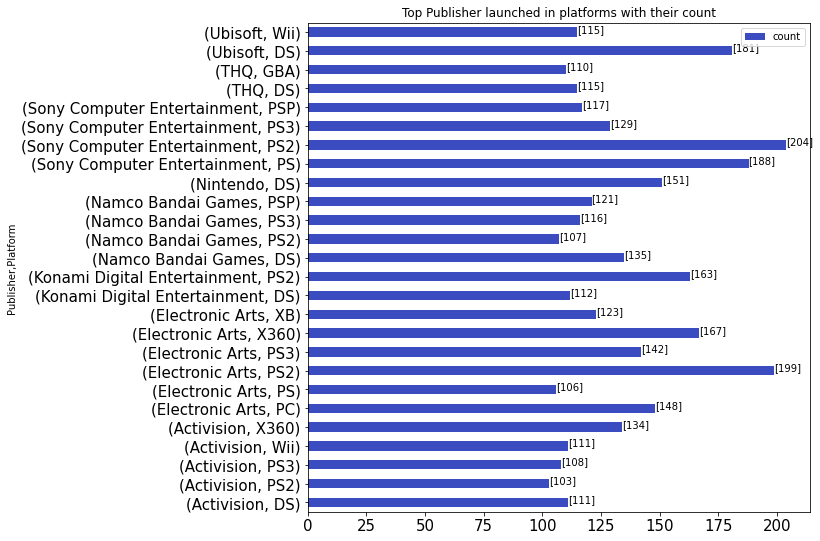

In [28]:
Number_of_game_publish.plot(kind='barh',figsize=(9,9),title='Top Publisher launched in platforms with their count',fontsize=15,colormap='coolwarm')
r=range(len(Number_of_game_publish.index))
for i,j in zip(r,Number_of_game_publish.values):
    plt.text(j,i,j)
    

<ipython-input-29-5c4280fa1512>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  x=df1.groupby(['Year'])['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'].sum().index
<ipython-input-29-5c4280fa1512>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  y=df1.groupby(['Year'])['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'].sum()


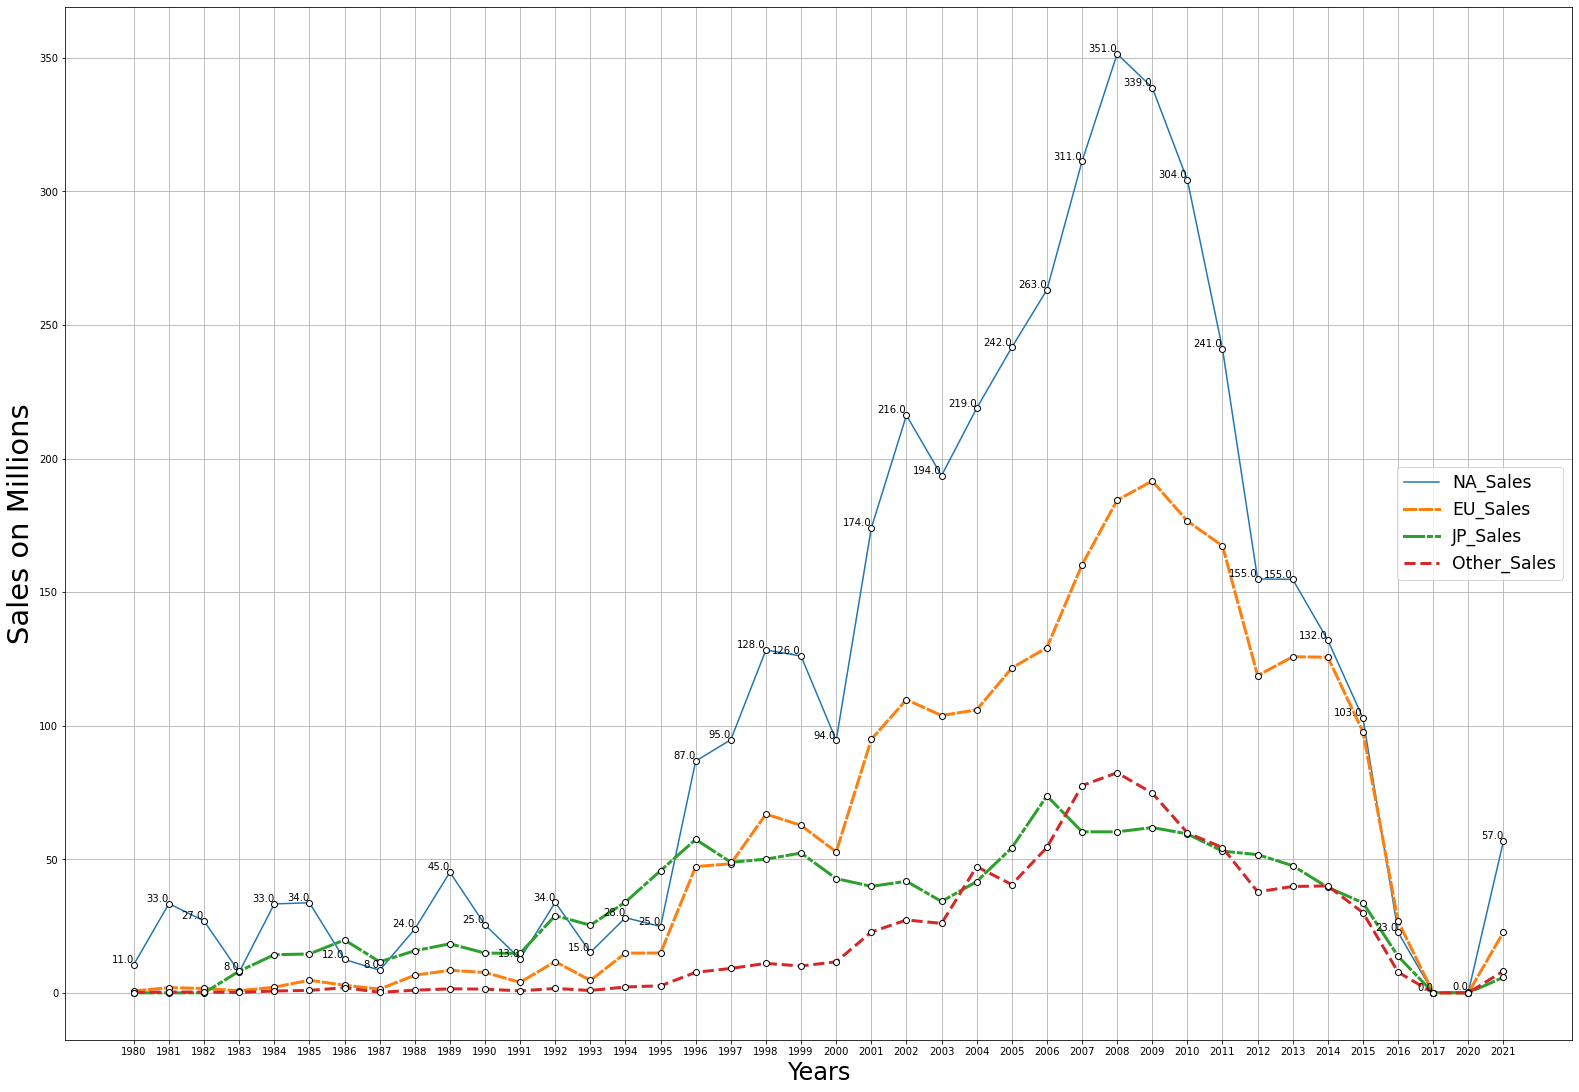

In [29]:
x=df1.groupby(['Year'])['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'].sum().index
y=df1.groupby(['Year'])['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'].sum()

plt.figure(figsize=(27,19))
plt.plot(x,y.NA_Sales,label='NA_Sales',dash_capstyle='projecting')
plt.plot(x,y.EU_Sales,label='EU_Sales',dash_capstyle='projecting',linestyle='--',linewidth=3)
plt.plot(x,y.JP_Sales,label='JP_Sales',dash_capstyle='projecting',linestyle='-.',linewidth=3)
plt.plot(x,y.Other_Sales,label='Other_Sales',linestyle='--',linewidth=3)
plt.legend(loc=7,fontsize='xx-large',title_fontsize=10)
plt.ylabel('Sales on Millions',fontsize=29)
plt.xlabel('Years',fontsize=24)

for xp,yp in zip(x,y.NA_Sales):
    label = np.around(yp)
    plt.annotate(label,(xp,yp),horizontalalignment="right",verticalalignment="bottom")
    plt.plot(xp, yp, "-o",color="k", markerfacecolor="w") 
for xp,yp in zip(x,y.EU_Sales):
    label = np.around(yp)
    plt.plot(xp, yp, "-o",color="k", markerfacecolor="w") 
for xp,yp in zip(x,y.JP_Sales):
    label = np.around(yp)
    plt.plot(xp, yp, "-o",color="k", markerfacecolor="w") 
for xp,yp in zip(x,y.Other_Sales):
    label = np.around(yp)   
    plt.plot(xp, yp, "-o",color="k", markerfacecolor="w") 

plt.grid()
plt.show()

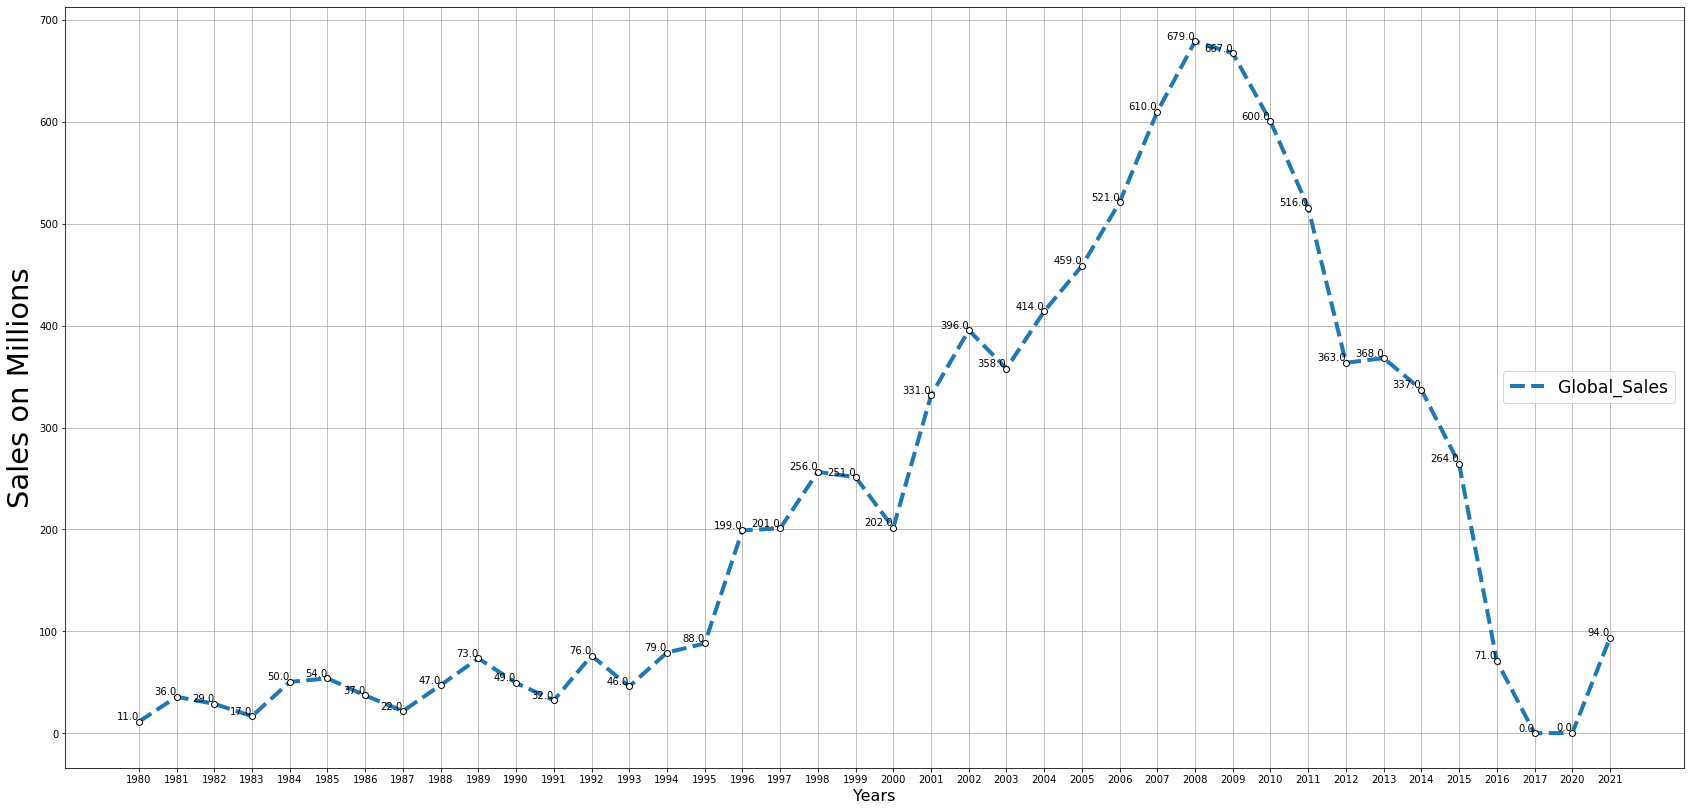

In [30]:
x=df1.groupby(['Year'])['Global_Sales'].sum().index
y=df1.groupby(['Year'])['Global_Sales'].sum()

plt.figure(figsize=(29,14))

plt.plot(x,y,label='Global_Sales',linestyle='--',linewidth=4)
plt.legend(loc=7,fontsize='xx-large',title_fontsize=10)
plt.ylabel('Sales on Millions',fontsize=29)
plt.xlabel('Years',fontsize=16)

for xp,yp in zip(x,y):
    label = np.around(yp)
    plt.annotate(label,(xp,yp),horizontalalignment="right",verticalalignment="bottom")
    plt.plot(xp, yp, "-o",color="k", markerfacecolor="w") 


plt.grid()
plt.show()


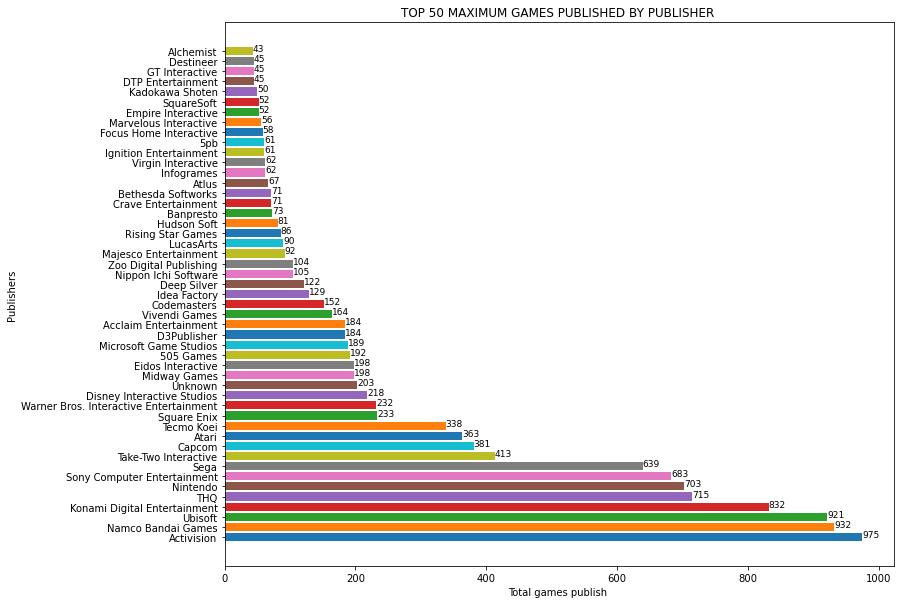

In [31]:
x=df1['Publisher'].value_counts().iloc[1:50].index
y=df1['Publisher'].value_counts().iloc[1:50].values
plt.figure(figsize=(12,10))
for x,y in zip(x,y):
    plt.barh(x,y)
    plt.ylabel('Publishers')
    plt.xlabel('Total games publish ')
    plt.title('TOP 50 MAXIMUM GAMES PUBLISHED BY PUBLISHER ')
    plt.text(y,x,y,fontsize=9)
plt.show()


0.34% out of 100% row from the data has been removed

In [32]:
percent_null=(null_index.shape[0]/df_reg.shape[0])*100
np.round(percent_null,2)

0.35

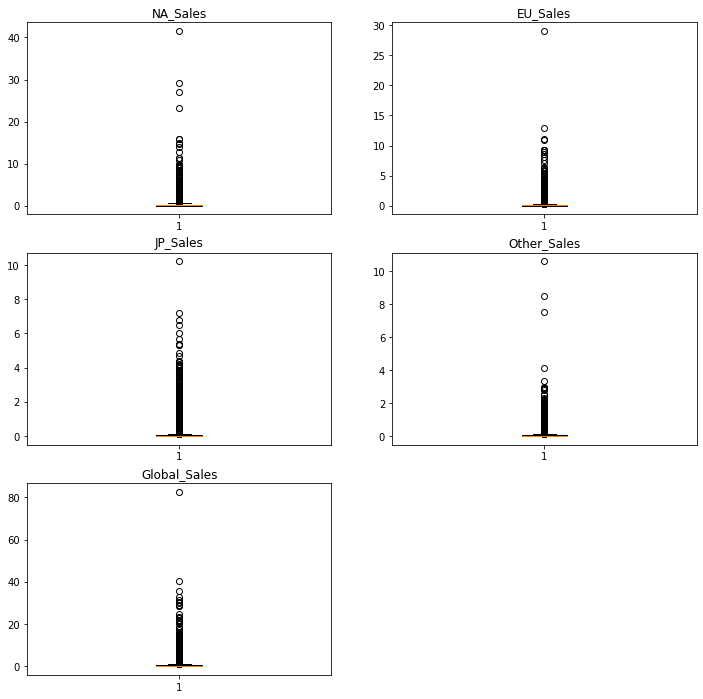

In [33]:
column=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']

plt.figure(figsize=(12,12))
for i,col in enumerate(column):
    plt.subplot(3,2,i+1)
    plt.boxplot(df_reg[col])
    plt.title(col)

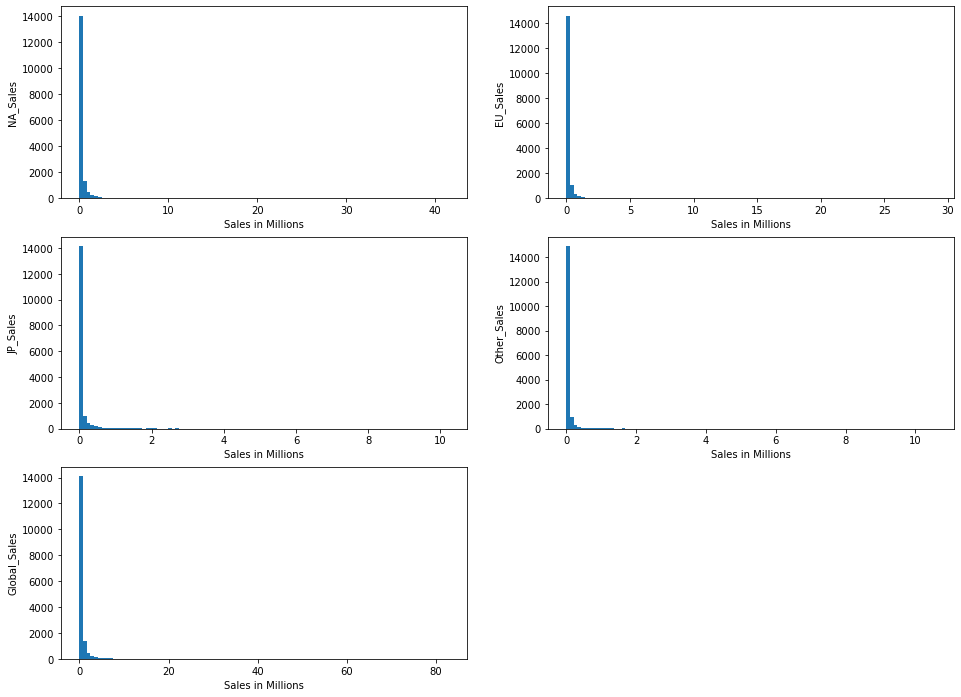

In [34]:
plt.figure(figsize=(16,12))
for i,col in enumerate(column):
    plt.subplot(3,2,i+1)
    plt.hist(df_reg[col],bins=100)
    plt.ylabel(col)
    plt.xlabel('Sales in Millions')

In [35]:
df.head()

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,,,,,
2006,1,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1985,2,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2008,3,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2009,4,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
1996,5,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [36]:
total_index=[]
def outliers(columns):
    global all_null_index,df_reg,df_reg_dropped
    for column in columns:
        q1=df_reg[column].quantile(q=0.25)
        q3=df_reg[column].quantile(q=0.75)
        
        iqr=q3-q1
        
        lower=q1-0.5*iqr
        upper=q3+0.5*iqr
        
        lower_index=df_reg[(df_reg[column])<lower].index
        upper_index=df_reg[(df_reg[column])>upper].index
        
        
        
        if len(lower_index)==0 or len(upper_index)==0:
            print("lower value index number:Null,upper value index number:{}".format(upper_index.values))
        else:
            print("lower value index number:{},upper value index number:{}".format(lower_index.values,upper_index.values))
       
    
        for ind_num in upper_index:
            total_index.append(ind_num)
            
    
    all_null_index=set(total_index)   
    print("Total length of Outlier index: {}".format(len(all_null_index)))
    
    print("Before dropping Outliers shape is: {}".format(df1.shape[0]))
    
     
    df_reg_dropped=df_reg.drop(index=all_null_index)
    
    print("After dropping Outliers shape is: {}".format(df_reg_dropped.shape[0]))
    
    percent_=(len(all_null_index)/df_reg.shape[0])*100
    print('Percentage of data dropped: {}%'.format(np.round(percent_,2)))
        
        
outliers(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])  


lower value index number:Null,upper value index number:[   0    1    2 ... 4941 4974 5144]
lower value index number:Null,upper value index number:[   0    1    2 ... 7761 7901 7935]
lower value index number:Null,upper value index number:[    0     1     2 ... 12235 12239 12243]
lower value index number:Null,upper value index number:[   0    1    2 ... 8794 9260 9819]
Total length of Outlier index: 6467
Before dropping Outliers shape is: 16540
After dropping Outliers shape is: 10131
Percentage of data dropped: 38.96%


In [37]:
before_maximum=df_reg.describe().loc['max']
after_maximum=df_reg_dropped.describe().loc['max']
print("before romaval maximum values:{},after romaval maximum values:{}".format(before_maximum,after_maximum))

before romaval maximum values:Rank            16600.00
NA_Sales           41.49
EU_Sales           29.02
JP_Sales           10.22
Other_Sales        10.57
Global_Sales       82.74
Name: max, dtype: float64,after romaval maximum values:Rank            16600.00
NA_Sales            0.36
EU_Sales            0.16
JP_Sales            0.06
Other_Sales         0.06
Global_Sales        0.58
Name: max, dtype: float64


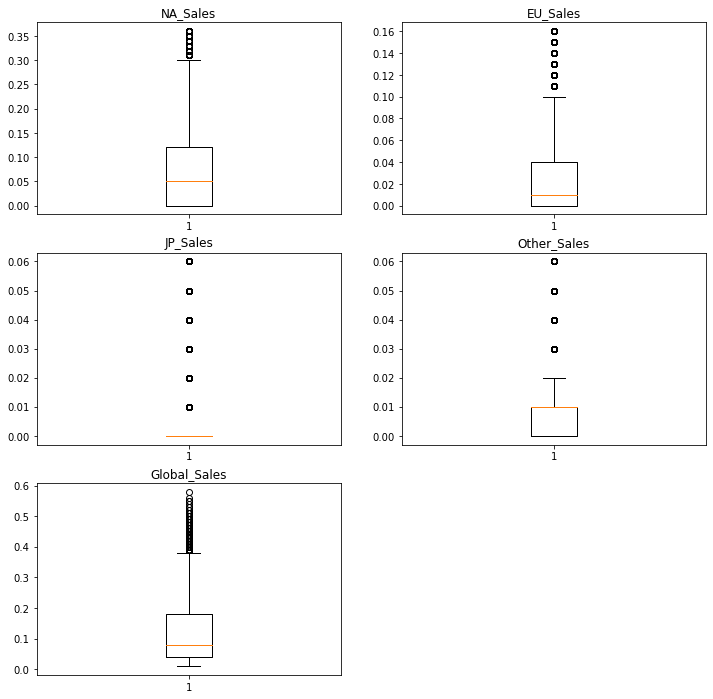

In [38]:
column=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']

plt.figure(figsize=(12,12))
for i,col in enumerate(column):
    plt.subplot(3,2,i+1)
    plt.boxplot(df_reg_dropped[col])
    plt.title(col)

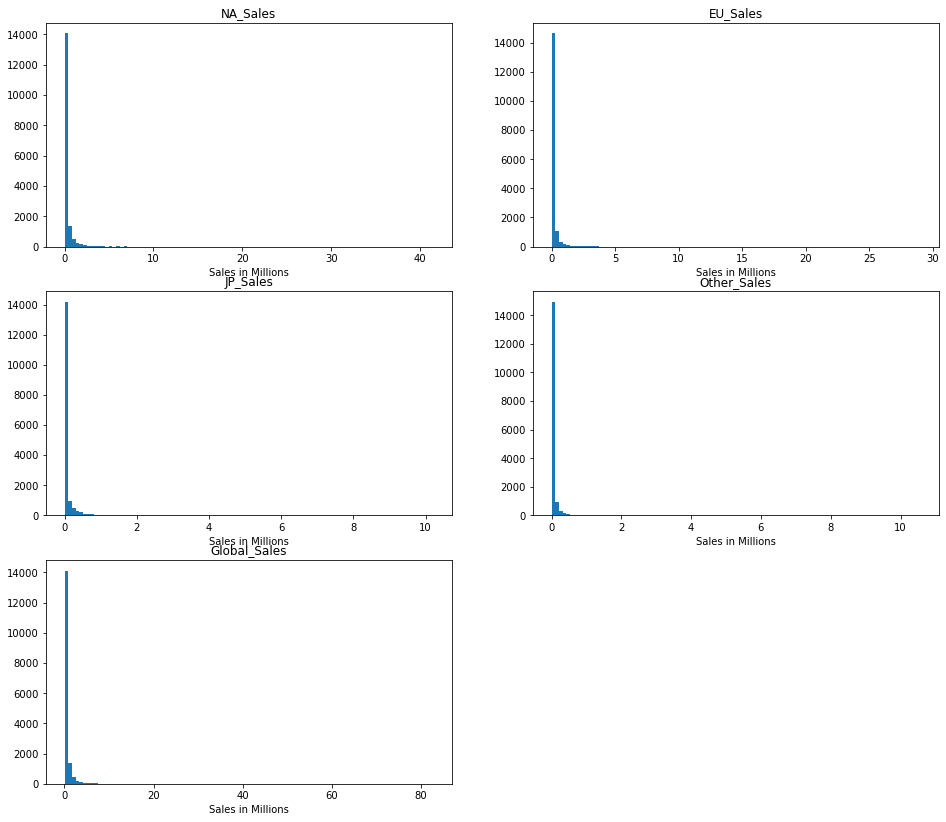

In [39]:
column=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']

plt.figure(figsize=(16,14))
for i,col in enumerate(column):
    plt.subplot(3,2,i+1)
    plt.hist(df_reg[col],bins=100)
    plt.title(col)
    plt.xlabel('Sales in Millions')

In [40]:
S.plot(kind='kde')

NameError: name 'S' is not defined

In [ ]:
print()
print(df_['EU_Sales'].skew(),df_reg['EU_Sales'].kurtosis())
print(df_['JP_Sales'].skew(),df_reg['JP_Sales'].kurtosis())
print(df_['Other_Sales'].skew(),df_reg['Other_Sales'].kurtosis())